# Panel de Visualización de datos AirBnB Sidney

## Herramienta para el análisis, visualización y predicción de datos de alquileres de piso para uso vacacional en la ciudad de Sidney (Australia).

### 1. Importar librerías a utilizar en el análisis de datos y visualización

In [5]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pan
import random
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import itertools as it
    

### 2. Importar base de datos .CSV

In [8]:
pan.read_csv ('sydney_airbnb.csv')

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,12351,Sydney City & Harbour at the door,17061,Stuart,NaN,Sydney,-33.865153,151.191896,Private room,100,2,493,2018-11-21,4.83,2,187
1,14250,Manly Harbour House,55948,Heidi,NaN,Manly,-33.800929,151.261722,Entire home/apt,471,5,1,2016-01-02,0.03,2,321
2,15253,Stunning Penthouse Apartment In Heart Of The City,59850,Morag,NaN,Sydney,-33.880455,151.216541,Private room,109,2,300,2018-11-16,3.63,2,316
3,20865,3 BED HOUSE + 1 BED STUDIO Balmain,64282,Fiona,NaN,Leichhardt,-33.859072,151.172753,Entire home/apt,450,7,15,2018-01-07,0.18,1,69
4,26174,"COZY PRIVATE ROOM, GREAT LOCATION!",110561,Amanda,NaN,Woollahra,-33.889087,151.259404,Private room,62,1,42,2018-11-23,0.45,1,140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36657,30592081,The top floor paradise,229475098,Sharney,NaN,Woollahra,-33.874940,151.259375,Entire home/apt,190,10,0,NaN,NaN,1,172
36658,30592161,Sydney harbour catamaran sailing. Parties for 10,223580521,Blake,NaN,Canada Bay,-33.847841,151.149573,Entire home/apt,900,1,0,NaN,NaN,1,168
36659,30592248,Double Room built-in a large and bright apartment,119396721,Nelson,NaN,Strathfield,-33.863719,151.081721,Private room,46,4,0,NaN,NaN,1,11
36660,30592505,Bright Modern apartment in a Premiere location,229479027,Sofei & Kelvin,NaN,Rockdale,-33.929960,151.150659,Entire home/apt,170,2,0,NaN,NaN,1,89


- Visualizamos las primeras 5 filas.

In [53]:
df.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,12351,Sydney City & Harbour at the door,17061,Stuart,NaN,Sydney,-33.865153,151.191896,Private room,100,2,493,2018-11-21,4.83,2,187
1,14250,Manly Harbour House,55948,Heidi,NaN,Manly,-33.800929,151.261722,Entire home/apt,471,5,1,2016-01-02,0.03,2,321
2,15253,Stunning Penthouse Apartment In Heart Of The City,59850,Morag,NaN,Sydney,-33.880455,151.216541,Private room,109,2,300,2018-11-16,3.63,2,316
3,20865,3 BED HOUSE + 1 BED STUDIO Balmain,64282,Fiona,NaN,Leichhardt,-33.859072,151.172753,Entire home/apt,450,7,15,2018-01-07,0.18,1,69
4,26174,"COZY PRIVATE ROOM, GREAT LOCATION!",110561,Amanda,NaN,Woollahra,-33.889087,151.259404,Private room,62,1,42,2018-11-23,0.45,1,140
5,38073,Modern apartment with pool and wifi,103476,Connie,NaN,North Sydney,-33.834429,151.208875,Entire home/apt,159,2,63,2017-09-16,0.64,1,321
6,39348,Large Bondi studio,168828,Marie,NaN,Waverley,-33.884821,151.282945,Entire home/apt,84,5,6,2018-11-17,0.77,2,194
7,44545,Sunny Darlinghurst Warehouse Apartment,112237,Atari,NaN,Sydney,-33.879956,151.215528,Entire home/apt,130,5,53,2018-11-05,0.54,1,1
8,45440,Rubys @ Bondi Beach! Huge beachhouse on the be...,201611,Deborah,NaN,Waverley,-33.889087,151.274506,Entire home/apt,700,3,54,2018-10-23,0.88,10,301
9,56842,Beach Breeze 2 BDR + Double balcony+ LOCATION !,113874,Bondi Beach Holiday Homes,NaN,Waverley,-33.889633,151.283553,Entire home/apt,226,2,17,2018-11-25,0.24,53,0


- Visualizamos las últimas 5 filas.

In [46]:
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
36657,30592081,The top floor paradise,229475098,Sharney,NaN,Woollahra,-33.874940,151.259375,Entire home/apt,190,10,0,NaN,NaN,1,172
36658,30592161,Sydney harbour catamaran sailing. Parties for 10,223580521,Blake,NaN,Canada Bay,-33.847841,151.149573,Entire home/apt,900,1,0,NaN,NaN,1,168
36659,30592248,Double Room built-in a large and bright apartment,119396721,Nelson,NaN,Strathfield,-33.863719,151.081721,Private room,46,4,0,NaN,NaN,1,11
36660,30592505,Bright Modern apartment in a Premiere location,229479027,Sofei & Kelvin,NaN,Rockdale,-33.929960,151.150659,Entire home/apt,170,2,0,NaN,NaN,1,89
36661,30593866,Huge Sunny Double Room with Spa in Best Location,51138070,Aaron & Natalie,NaN,Sydney,-33.906938,151.211255,Private room,80,5,0,NaN,NaN,3,11


### 3.  Asignar la base de datos a un DataFrame (df)

In [22]:
df = pan.read_csv ('sydney_airbnb.csv')

### 4. Exploración inicial de datos

> #### 4.1. Tipo de objetos (int,string, object, boolean, range).

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36662 entries, 0 to 36661
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              36662 non-null  int64  
 1   name                            36650 non-null  object 
 2   host_id                         36662 non-null  int64  
 3   host_name                       36656 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   36662 non-null  object 
 6   latitude                        36662 non-null  float64
 7   longitude                       36662 non-null  float64
 8   room_type                       36662 non-null  object 
 9   price                           36662 non-null  int64  
 10  minimum_nights                  36662 non-null  int64  
 11  number_of_reviews               36662 non-null  int64  
 12  last_review                     

> #### 4.2. Nombre y tipo de variables (columnas).

In [84]:
categoricas = ["id", "host_id", "name", "host_name", "neighbourhood", "room_type", "last_review"] 

numericas = ["latitude", "longitude", "price", "minimum_nights", "number_of_reviews", "reviews_per_month", "calculated_host_listings_count", "availability_365"]

> #### 4.3. Información de filas (primeras y últimas).

In [85]:
df.isnull().sum()

id                                    0
name                                 12
host_id                               0
host_name                             6
neighbourhood_group               36662
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       11937
reviews_per_month                 11937
calculated_host_listings_count        0
availability_365                      0
dtype: int64

> #### 4.5. Datos duplicados (conteo e identificación).

In [54]:
df_dup = df[df.duplicated()]
len(df_dup)

0

### 5. Ingeniería de características

Borramos la columna inservible

In [79]:
df_filtrado=df.drop( ["neighbourhood_group"] ,axis = 1 )

### 6. Visualización de datos

<AxesSubplot:>

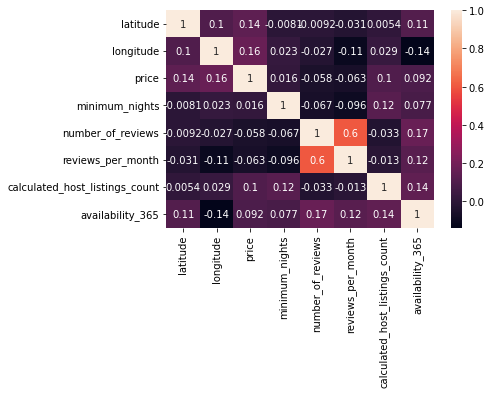

In [87]:
sns.heatmap(df_filtrado[numericas].corr(), annot=True)

### 7. Análisis estadístico de datos

In [66]:
df[numericas].describe()

,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,0.0,36662.000000,36662.000000,36662.000000,36662.000000,36662.000000,24725.000000,36662.000000,36662.000000
mean,NaN,-33.863112,151.204259,207.689597,5.096885,12.185178,1.139057,7.115106,97.387595
std,NaN,0.071501,0.083529,323.818795,15.664862,28.652548,1.536521,24.611284,122.969054
min,NaN,-34.135212,150.642903,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,NaN,-33.898444,151.179678,80.000000,1.000000,0.000000,0.140000,1.000000,0.000000
50%,NaN,-33.882486,151.215923,136.000000,2.000000,2.000000,0.490000,1.000000,36.000000
75%,NaN,-33.832072,151.261413,223.000000,5.000000,9.000000,1.520000,2.000000,165.000000
max,NaN,-33.389728,151.339811,14999.000000,1000.000000,493.000000,15.180000,197.000000,365.000000


### Panel de Visualización de datos (link Streamlit)

### Tablero de trabajo (desarrollo del proyecto) : Link Trolle

> *Mapeo de ubicaciones de los inmuebles AirBnB a arrendar en Sidney*

**Ejemplo con bicicleterias de Buenos Aires Argentina**

dataset de bicicleterías de Ciudad de Buenos Aires
descargado desde https://data.buenosaires.gob.ar/dataset/bicicleterias

bici = pd.read_csv('data/bicicleterias.csv', sep=';')
bici.head()

corregimos el campo de coordenadas del dataset.

def coord(c):
    coor = re.findall(r'-?\d+\.\d{7}', c)
    coords = [float(s) for s in coor]
    return coords[::-1]

bici['WKT'] = bici['WKT'].apply(coord)

filtramos solo las bicicleterías de palermo

bici_palermo = bici[bici.BARRIO == 'PALERMO'][['WKT', 'NOMBRE']]

creamos el mapa con folium

mapa = folium.Map(location=[-34.588889, -58.430556], zoom_start=13)

agregamos los markers con el nombre de cada bicicletería.

for index, row in bici_palermo.iterrows():
    mapa.simple_marker(row['WKT'], 
                   popup=row['NOMBRE'], marker_color='red',
                   marker_icon='info-sign')
    
    
visualizamos el mapa con los markers

mapa




In [8]:
# Ejemplos básicos de Follium

import folium

m = folium.Map(location=[40.965, -5.664])
m

In [9]:
folium.Map(
    location=[40.965, -5.664],
    tiles='Stamen Toner',
    zoom_start=16
)

In [10]:
m = folium.Map(
    location=[40.965, -5.664],
    zoom_start=12,
    tiles='Stamen Terrain'
)

tooltip = 'plaza Mayor'

folium.Marker([40.965, -5.664], popup='Plaza Mayor', tooltip=tooltip).add_to(m)


m

# Mapa interactivo de Sydney Australia (follium)

**Información de Sydney Australia**

*Coordenadas geográficas de Sídney* 	

Latitud: -33.8667, 

Longitud: 151.2 33° 52′ 0″ Sur, 
          151° 12′ 0″ Este

In [12]:
import folium

m = folium.Map(location=[-33.8667,151.2])
m

  **Stamen Toner (tesela raster)**

In [13]:
folium.Map(
    location=[-33.86785,151.20732],
    tiles='Stamen Toner',
    zoom_start=16
)

**Stamen Terrain (tesela raster)**

In [15]:
m = folium.Map(
    location=[-33.86785,151.20732],
    zoom_start=12,
    tiles='Stamen Terrain'
)

tooltip = 'Ópera de Sidney'

folium.Marker([-33.8567844, 151.2152967], popup='Ópera de Sidney', tooltip=tooltip).add_to(m)


m


#Ópera de Sidney

#Latitud: -33.8567844. Longitud: 151.2152967 